# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("../../assets/datasets/imdb_p6_sample.csv")
df

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1
5,429172,8.9,tt0050083,12 Angry Men,1957,1,0,0,0,0,0,0,0
6,1280264,8.9,tt0110912,Pulp Fiction,1994,0,0,0,0,0,0,1,0
7,1175740,8.9,tt0167260,The Lord of the Rings: The Return of the King,2003,1,0,0,1,0,0,0,1
8,487214,8.9,tt0060196,"The Good, the Bad and the Ugly",1966,0,0,0,0,0,1,1,0
9,1298873,8.9,tt0137523,Fight Club,1999,0,1,0,0,0,1,0,0


In [27]:
from sklearn.preprocessing import MinMaxScaler


y = df.rating
X = df.loc[:,"year":]
#We want to normalize the year
#X["year"] = normalize(X[""])
X["year"] = MinMaxScaler().fit_transform(X["year"].astype(float).reshape(-1,1))
X.head()

,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,0.750000,0,1,0,1,0,0,0,1
1,0.406250,1,1,0,0,1,0,1,0
2,0.437500,1,1,0,0,1,0,0,1
3,0.968750,1,1,1,0,1,0,1,1
4,0.734375,1,1,1,1,1,1,1,1


## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [28]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor

cv = KFold(len(y), shuffle=False)
print cv
dt = DecisionTreeRegressor(random_state=5)
dtScore = cross_val_score(dt, X, y, cv=cv)
dtScore
dtScore.mean()

sklearn.cross_validation.KFold(n=26, n_folds=3, shuffle=False, random_state=None)


-21.646296296296402

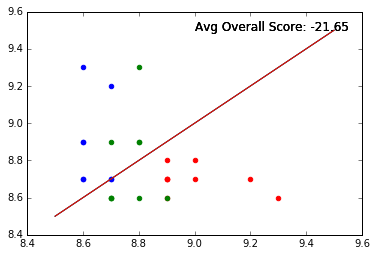

In [29]:
def doPlot(model, m=None):
    for fold, color in zip(cv, ["r", "g", "b"]):
        #print fold
        X_train = X.iloc[fold[0]]
        X_test = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "Avg Overall Score: "+str(m), fontsize=12)
        #the 9,9.5 represent the location os "R2: "
    
doPlot(dt, dtScore.mean().round(2))

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

In [30]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

rf = RandomForestRegressor(random_state=5)
rfScore = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
print rfScore, dtScore
print rfScore.mean(), dtScore.mean()

[ -5.20777778  -0.8625     -29.976     ] [ -5.05555556 -10.75       -49.13333333]
-12.0154259259 -21.6462962963


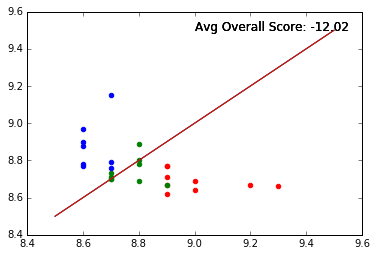

In [31]:
doPlot(rf, rfScore.mean().round(2))

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [32]:
ab = AdaBoostRegressor(random_state=5)

abScore = cross_val_score(ab, X, y, cv=cv, n_jobs=-1)
print abScore, rfScore, dtScore
print abScore.mean(), rfScore.mean(), dtScore.mean()

[ -5.68196579  -5.80162273 -30.43703704] [ -5.20777778  -0.8625     -29.976     ] [ -5.05555556 -10.75       -49.13333333]
-13.9735418533 -12.0154259259 -21.6462962963


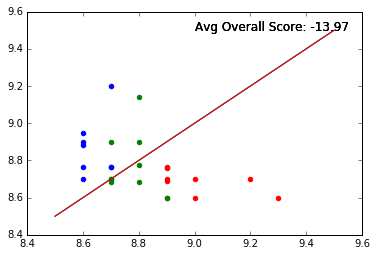

In [33]:
doPlot(ab, abScore.mean().round(2))

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=5)

gbScore = cross_val_score(gb, X, y, cv=cv, n_jobs=-1)
print gbScore, abScore, rfScore, dtScore
print gbScore.mean(), abScore.mean(), rfScore.mean(), dtScore.mean()

[ -5.46663384  -4.11139833 -31.81886778] [ -5.68196579  -5.80162273 -30.43703704] [ -5.20777778  -0.8625     -29.976     ] [ -5.05555556 -10.75       -49.13333333]
-13.7989666524 -13.9735418533 -12.0154259259 -21.6462962963


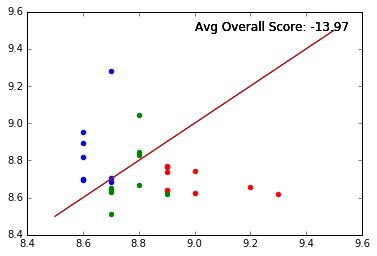

In [35]:
doPlot(gb, abScore.mean().round(2))

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.